In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
sns.set(color_codes = True)

In [3]:
%load_ext autoreload
%autoreload 2    
%matplotlib inline

## Loading the dataset

#### Lattice-physics (PWR fuel assembly neutronics simulation results)

This dataset encompasses lattice-physics parameters—the infinite multiplication factor (k-inf) and the pin power peaking factor (PPPF)—modeled as functions of variations in fuel pin enrichments for the NuScale US600 fuel assembly type C-01 (NFAC-01) [NuScale FSAR]. These critical parameters were computed using the MCNP6 code, a Monte Carlo-based tool for nuclear reactor criticality simulations. Fuel pin enrichments were uniformly sampled within the range of 0.7–5.0 weight percent (w/o) U-235 to generate the dataset. The dataset contains 39 features, each representing the enrichment of a specific fuel rod in a one-eighth symmetry of the NFAC assembly. The outputs of interest are the k-inf and PPPF values associated with these enrichments.

In [43]:
df_raw = pd.read_csv('raw.csv', delim_whitespace=True, header=None)
df_test = pd.read_csv('test.csv', delim_whitespace=True, header=None)

C:\Users\Asus\AppData\Local\Temp\ipykernel_11620\825625791.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_raw = pd.read_csv('raw.csv', delim_whitespace=True, header=None)
C:\Users\Asus\AppData\Local\Temp\ipykernel_11620\825625791.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_test = pd.read_csv('test.csv', delim_whitespace=True, header=None)


In [45]:
df_raw.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40],
      dtype='int64')

In [47]:
df_test.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40],
      dtype='int64')

In [49]:
df_raw.shape

(24000, 41)

In [51]:
df_test.shape

(360, 41)

In [53]:
df_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.32630,1.862086,3.562615,1.112359,4.208065,1.412679,2.271031,3.950614,3.627032,4.600332,...,3.965987,4.030999,0.826347,2.088521,4.088550,1.184149,2.780985,2.865400,4.773820,3.539373
1,1.34149,1.786558,2.354766,1.047929,2.268974,4.637777,3.793194,2.859702,4.361058,3.592485,...,2.228000,4.837370,2.846538,3.413201,4.154079,4.700800,3.597879,4.681148,3.215494,3.972672
2,1.33034,1.826187,3.037997,4.719517,1.502280,3.644736,3.575727,1.337686,2.380347,4.503771,...,2.615278,3.757999,3.161658,4.996056,3.339642,2.548468,4.417111,1.375554,4.363320,2.988546
3,1.35653,1.739225,4.412804,2.220680,3.132738,1.327124,4.759890,2.882082,3.663430,4.531524,...,3.899026,1.018926,4.379308,3.280298,3.916281,3.179922,3.769315,0.849544,2.508179,0.912272
4,1.30190,1.955829,2.790669,0.798177,1.231750,1.977844,2.393930,4.738126,1.364743,3.391665,...,3.641512,1.564076,2.178406,2.754888,4.007165,0.702069,4.064682,1.370575,0.769475,1.395959


In [55]:
# Splitting dataframe into independent and depenndent variables
X_train = df_raw.iloc[:,:39].values
X_test = df_test.iloc[:,:39].values
k_train = df_raw.iloc[:,39].values
pppf_train = df_raw.iloc[:,40].values
k_test = df_test.iloc[:,39].values
pppf_test = df_test.iloc[:,40].values

### Visualization and Analysis

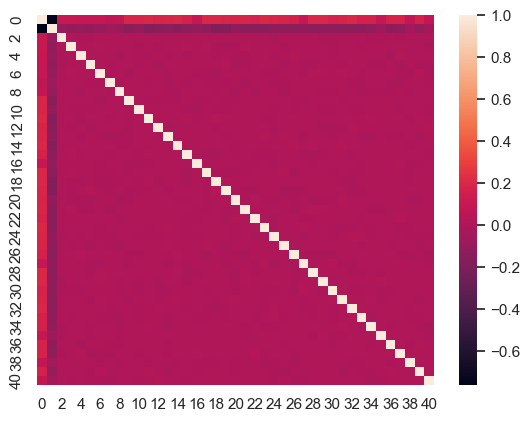

<Figure size 4000x4000 with 0 Axes>

In [78]:
sns.heatmap(df_raw.corr())
plt.figure(figsize=(40,40))
plt.show()

In [81]:
df_raw.corr()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.000000,-0.759605,0.102774,0.102483,0.089948,0.088018,0.098331,0.069360,0.081567,0.185946,...,0.180150,0.189721,0.166082,0.165771,0.094461,0.172454,0.169207,0.073728,0.164963,0.080209
1,-0.759605,1.000000,-0.093509,-0.102983,-0.094113,-0.099956,-0.086067,-0.058925,-0.089814,-0.134865,...,-0.132193,-0.129294,-0.120930,-0.112089,-0.067167,-0.113655,-0.108519,-0.038380,-0.096323,-0.051214
2,0.102774,-0.093509,1.000000,0.003639,-0.004330,-0.007865,0.004786,0.002427,0.005628,-0.002136,...,-0.000530,0.003989,0.005327,-0.006493,-0.005610,-0.001428,-0.005025,0.000148,0.000275,-0.000219
3,0.102483,-0.102983,0.003639,1.000000,0.001823,0.002502,0.011365,-0.000109,0.007572,0.003400,...,0.000885,-0.003302,-0.007996,0.004219,-0.002813,0.000316,-0.000966,0.000928,0.002001,-0.009524
4,0.089948,-0.094113,-0.004330,0.001823,1.000000,-0.000747,-0.001036,0.007819,-0.015183,-0.000022,...,-0.002218,0.004412,0.000340,0.001152,-0.002846,-0.013644,0.012091,-0.002535,-0.002713,-0.003410
5,0.088018,-0.099956,-0.007865,0.002502,-0.000747,1.000000,0.000188,-0.006482,0.000423,0.010032,...,-0.003655,0.006701,-0.002603,-0.007969,-0.004941,0.001262,-0.021113,0.000370,-0.005586,-0.005962
6,0.098331,-0.086067,0.004786,0.011365,-0.001036,0.000188,1.000000,-0.004473,0.002864,-0.010482,...,0.010358,0.006724,-0.006207,0.008477,-0.002063,-0.000344,-0.008030,-0.005530,0.020003,-0.004631
7,0.069360,-0.058925,0.002427,-0.000109,0.007819,-0.006482,-0.004473,1.000000,-0.009612,0.005408,...,-0.002100,-0.005992,-0.006807,-0.002707,-0.000211,-0.005799,-0.012017,0.001791,-0.002224,-0.008588
8,0.081567,-0.089814,0.005628,0.007572,-0.015183,0.000423,0.002864,-0.009612,1.000000,-0.002789,...,-0.000757,0.005148,-0.012376,-0.008857,-0.004674,-0.006582,0.004813,-0.004778,0.009265,0.008477
9,0.185946,-0.134865,-0.002136,0.003400,-0.000022,0.010032,-0.010482,0.005408,-0.002789,1.000000,...,-0.005823,0.001993,0.005259,-0.002236,0.008908,0.003367,0.001811,0.009207,-0.002998,-0.002805
